# 加载MNIST数据集

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data('F:/demo/tensorflow/mnistcnn/mnist/mnist.npz')

print(x_train.shape,type(x_train))
print(y_train.shape,type(y_train))

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


# 数据规范化

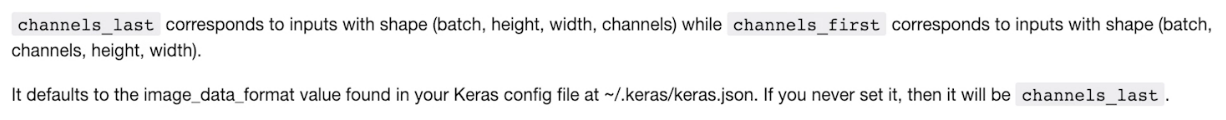

In [3]:
from keras import backend as K

img_rows , img_cols = 28,28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0],1,img_rows,img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows,img_cols,1)
    
print(x_train.shape,type(x_train))
print(x_test.shape,type(x_test))

(60000, 28, 28, 1) <class 'numpy.ndarray'>
(10000, 28, 28, 1) <class 'numpy.ndarray'>


In [4]:
# 将数据类型转化为float32
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
# 数据归一化
X_train /= 255
X_test /= 255

print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

60000 train samples
10000 test samples


# 统计训练数据中各标签数量

In [5]:
import numpy as np
import matplotlib.pyplot as plt

label,count = np.unique(y_train,return_counts=True)
print(label,count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


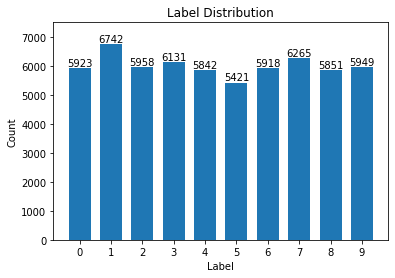

In [6]:
fig = plt.figure()
plt.bar(label,count,width=0.7,align='center')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,'%d'% b,ha='center',va = 'bottom',fontsize = 10)

plt.show()

In [7]:
from keras.utils import np_utils

n_classes = 10
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)
Y_test = np_utils.to_categorical(y_test,n_classes)

Shape before one-hot encoding: (60000,)
Shape after one-hot encoding: (60000, 10)


# 使用使用Keras sequential model 定义MNIST CNN网络

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

model = Sequential()
# 第一层卷积，32个3*3的卷积核，激活函数使用relu
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
# 第二层卷积，64个3*3卷积核，激活函数使用relu
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
# 最大池化层 池化窗口2*2
model.add(MaxPooling2D(pool_size=(2,2)))
# Dropout 25% 的输入神经元
model.add(Dropout(0.25))
# 将Pooled feature map 摊平后输入全连接网络
model.add(Flatten())

## classification
# 全连接层
model.add(Dense(128,activation='relu'))
# Dropout 50% 的输入神经元
model.add(Dropout(0.5))
# 使用softmax 激活函数做多分类，输出各数字的概率
model.add(Dense(n_classes,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# 查看MNIST CNN模型的网络结构

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [10]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 26, 26, 32]
[None, 24, 24, 64]
[None, 12, 12, 64]
[None, 12, 12, 64]
[None, None]
[None, 128]
[None, 128]
[None, 10]


# 编译模型

In [11]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

# 训练模型，将指标保存到history中

In [14]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=5,
                    verbose=2,
                    validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





 - 31s - loss: 0.2336 - acc: 0.9286 - val_loss: 0.0519 - val_acc: 0.9839
Epoch 2/5
 - 32s - loss: 0.0820 - acc: 0.9755 - val_loss: 0.0423 - val_acc: 0.9858
Epoch 3/5
 - 29s - loss: 0.0618 - acc: 0.9810 - val_loss: 0.0366 - val_acc: 0.9876
Epoch 4/5
 - 29s - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0327 - val_acc: 0.9880
Epoch 5/5
 - 29s - loss: 0.0443 - acc: 0.9862 - val_loss: 0.0295 - val_acc: 0.9910


# 可视化指标

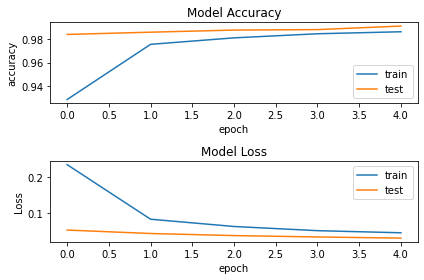

In [15]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout()

plt.show()

# 保存模型

In [16]:
import os
import tensorflow.gfile as gfile

save_dir = "F:/demo/tensorflow/mnistcnn/model"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir,model_name)
model.save(model_path)
print("Saved trained model at %s" %model_path)




Saved trained model at F:/demo/tensorflow/mnistcnn/model\keras_mnist.h5


# 加载模型

In [17]:
from keras.models import load_model
mnist_model = load_model(model_path)

# 统计模型在测试集上的分类结果

In [18]:
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)

print("Test Loss:{}".format(loss_and_metrics[0]))
print("Test Accuracy:{}%".format(loss_and_metrics[1]*100))

predicted_classes = mnist_model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count:{}".format(len(correct_indices)))
print("Classified incorrectly count:{}".format(len(incorrect_indices)))

Test Loss:0.029499802163658023
Test Accuracy:99.1%
Classified correctly count:9910
Classified incorrectly count:90
